## Named Entity Recognition

`Task:`  
- Develop a model for Named Entity Recognition using Hidden Markov Model.  
- Remove the labels from the Corpus and use Baum Welch algorithm to estimate the learning parameters.  


HMM : 2 assumptions
- Bi gram model
- wi depends on ti

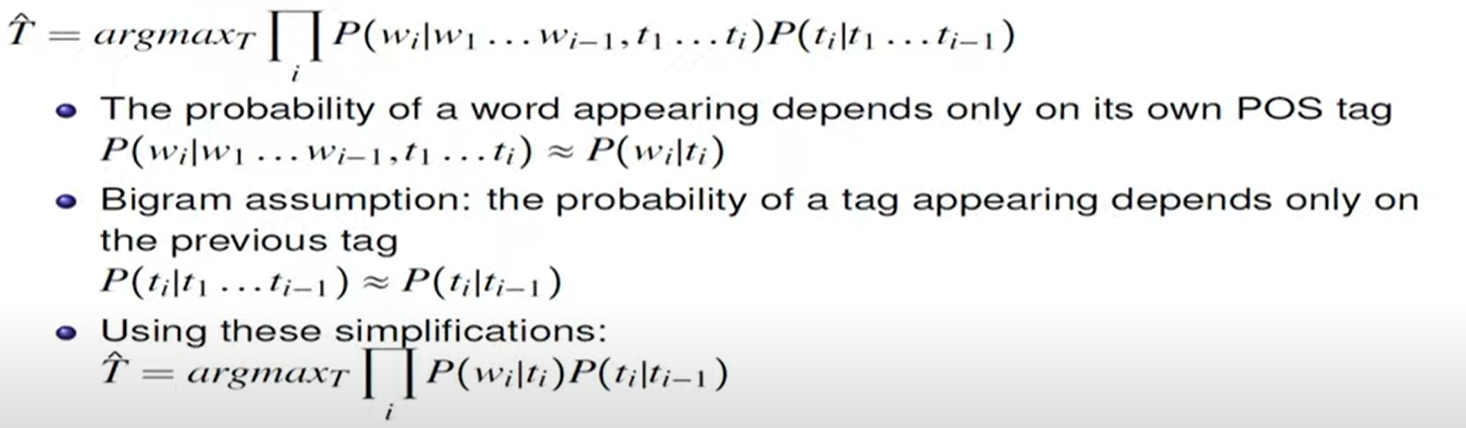
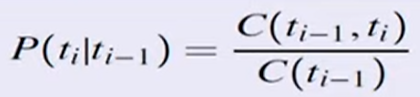
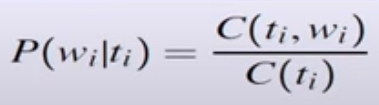

### Import necessary libraies and load the dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GroupShuffleSplit
import regex as re
from sklearn.metrics import classification_report, confusion_matrix
from hmmlearn import hmm

In [ ]:
# !pip install hmmlearn

In [2]:
data = pd.read_csv('ner_dataset.csv', encoding='latin1')

### Understanding the data

In [3]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
data.shape

(1048575, 4)

In [10]:
data.head(25)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [11]:
data.isnull().sum()

Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64

In [9]:
data = data.fillna(method = 'ffill') # fills the missing values with the value in the previous row

C:\Temp\ipykernel_11824\3808441187.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method = 'ffill') # fills the missing values with the value in the previous row


In [12]:
' '.join(data[data['Sentence #'] == 'Sentence: 1']['Word'].values)

'Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .'

In [13]:
data.nunique()

Sentence #    47959
Word          35177
POS              42
Tag              17
dtype: int64

### Data Preparation - Split the data into train and test set

We use **GroupShuffleSplit** to spilt the data into train and test set as using **train_test_split** will make some parts of the sentence go to train set and others to test set

In [14]:
x = data.drop(columns='Tag')
y = data['Tag']

In [15]:
split_gs = GroupShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
# n_splits (default=5) : Number of re-shuffling & splitting iterations.

In [17]:
x_train, x_test = next(split_gs.split(x, y, groups=x['Sentence #']))

In [18]:
type(x_train)

numpy.ndarray

In [19]:
train_data = data.iloc[x_train]
test_data = data.iloc[x_test]

In [20]:
type(train_data)

pandas.core.frame.DataFrame

In [21]:
train_data.head()

,Sentence #,Word,POS,Tag
24,Sentence: 2,Families,NNS,O
25,Sentence: 2,of,IN,O
26,Sentence: 2,soldiers,NNS,O
27,Sentence: 2,killed,VBN,O
28,Sentence: 2,in,IN,O


In [22]:
train_data.shape

(734523, 4)

In [26]:
data_update = train_data.sample(frac=0.1, replace=False, random_state=40).reset_index(drop=True)
# new data frame with 10% of the original data

In [27]:
data_update.shape

(73452, 4)

In [28]:
data_update.head()

,Sentence #,Word,POS,Tag
0,Sentence: 15295,that,IN,O
1,Sentence: 44105,six-nation,JJ,O
2,Sentence: 3863,could,MD,O
3,Sentence: 27738,Defense,NNP,B-org
4,Sentence: 33298,run,VB,O
